==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import statistics as st
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

## Data Cleaning  and EDA 

In [2]:
data = pd.read_csv("hour.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.shape

(17379, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# noNull value
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check duplicet value
data.duplicated().sum()

0

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
# since we have no use of this column so dropt it 
data.drop("instant",axis=1,inplace=True)
# we have no use of this feature we extract month and year from it
data.drop("dteday",axis=1, inplace=True)

In [11]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [12]:
# changing name foruser frandly
data["year"] = data["yr"]
data["months"] = data["mnth"]
data["hours"] = data["hr"]
data["humidity"] = data["hum"]
data["counts"] = data["cnt"]

In [13]:
# drop all colun ince you rename that columns
data.drop(["yr","mnth","hr","hum","cnt"],axis=1,inplace=True)

In [14]:
data

,season,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,year,months,hours,humidity,counts
0,1,0,6,0,1,0.24,0.2879,0.0000,3,13,0,1,0,0.81,16
1,1,0,6,0,1,0.22,0.2727,0.0000,8,32,0,1,1,0.80,40
2,1,0,6,0,1,0.22,0.2727,0.0000,5,27,0,1,2,0.80,32
3,1,0,6,0,1,0.24,0.2879,0.0000,3,10,0,1,3,0.75,13
4,1,0,6,0,1,0.24,0.2879,0.0000,0,1,0,1,4,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,1,2,0.26,0.2576,0.1642,11,108,1,12,19,0.60,119
17375,1,0,1,1,2,0.26,0.2576,0.1642,8,81,1,12,20,0.60,89
17376,1,0,1,1,1,0.26,0.2576,0.1642,7,83,1,12,21,0.60,90
17377,1,0,1,1,1,0.26,0.2727,0.1343,13,48,1,12,22,0.56,61


In [15]:
numerical_feature = data.select_dtypes(exclude="object").columns
print(numerical_feature)

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'windspeed', 'casual', 'registered', 'year', 'months', 'hours',
       'humidity', 'counts'],
      dtype='object')


In [16]:
data.describe()

,season,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,year,months,hours,humidity,counts
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.190098,35.676218,153.786869,0.502561,6.537775,11.546752,0.627229,189.463088
std,1.106918,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.122340,49.305030,151.357286,0.500008,3.438776,6.914405,0.192930,181.387599
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.104500,4.000000,34.000000,0.000000,4.000000,6.000000,0.480000,40.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.194000,17.000000,115.000000,1.000000,7.000000,12.000000,0.630000,142.000000
75%,3.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.253700,48.000000,220.000000,1.000000,10.000000,18.000000,0.780000,281.000000
max,4.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,367.000000,886.000000,1.000000,12.000000,23.000000,1.000000,977.000000


In [17]:
less_count = data[["months","year","hours","weathersit","workingday","weekday","holiday","season"]].columns

In [18]:
# fetch unique values of less then 24
for i in less_count:
    print(i,data[i].unique())

months [ 1  2  3  4  5  6  7  8  9 10 11 12]
year [0 1]
hours [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
weathersit [1 2 3 4]
workingday [0 1]
weekday [6 0 1 2 3 4 5]
holiday [0 1]
season [1 2 3 4]


In [19]:
data["season"] = data["season"].map({1:"springer", 2:"summer", 3:"fall", 4:"winter"})

In [20]:
data["weekday"] = data["weekday"].map({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"})

In [21]:
data["weathersit"] = data["weathersit"].map({1: "Clear + Few clouds",2: "Mist + Cloudy",3: "Light Snow, Light Rain + Thunderstorm",4: "Heavy Rain + Ice Pallets"})

In [22]:
data["months"] = data["months"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apri",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

<AxesSubplot:title={'center':'Value Count of month'}, xlabel='months', ylabel='counts'>

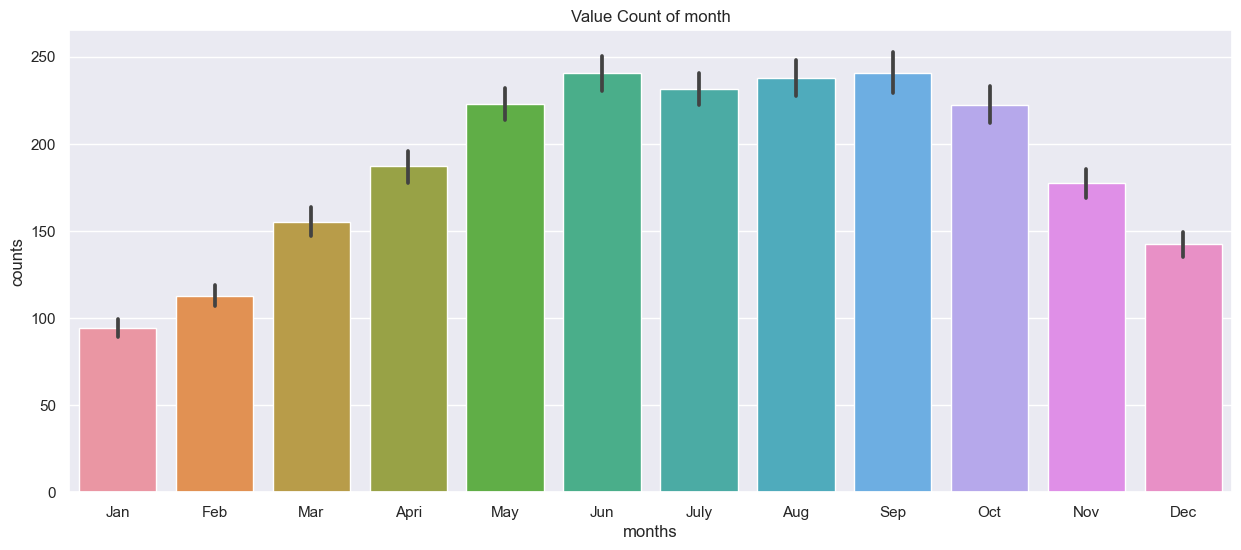

In [23]:
plt.title("Value Count of month")
# All 12 months 
sns.barplot(x="months",y="counts",data=data)
# observation is in june there is highest Bike Rentals

<AxesSubplot:title={'center':'Value Count of year'}, xlabel='year', ylabel='counts'>

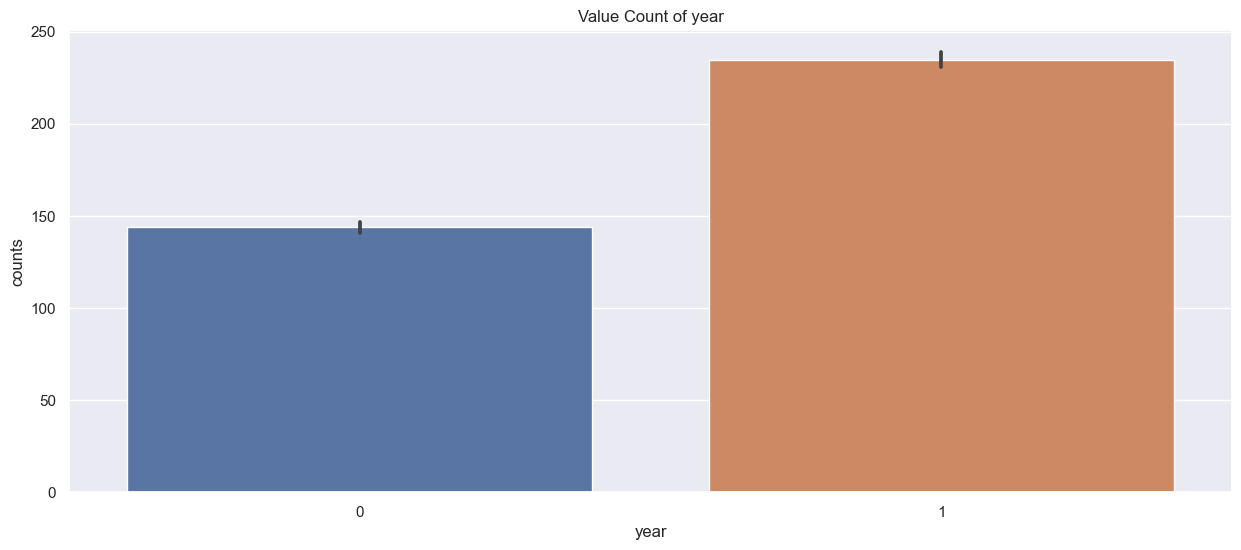

In [24]:
plt.title("Value Count of year")
# 0 for 2011 1 for 2012 
sns.barplot(x="year",y="counts",data=data)
# observation is in 2012 there is higest Bike Rentals

<AxesSubplot:title={'center':'Value Count vs hours'}, xlabel='hours', ylabel='counts'>

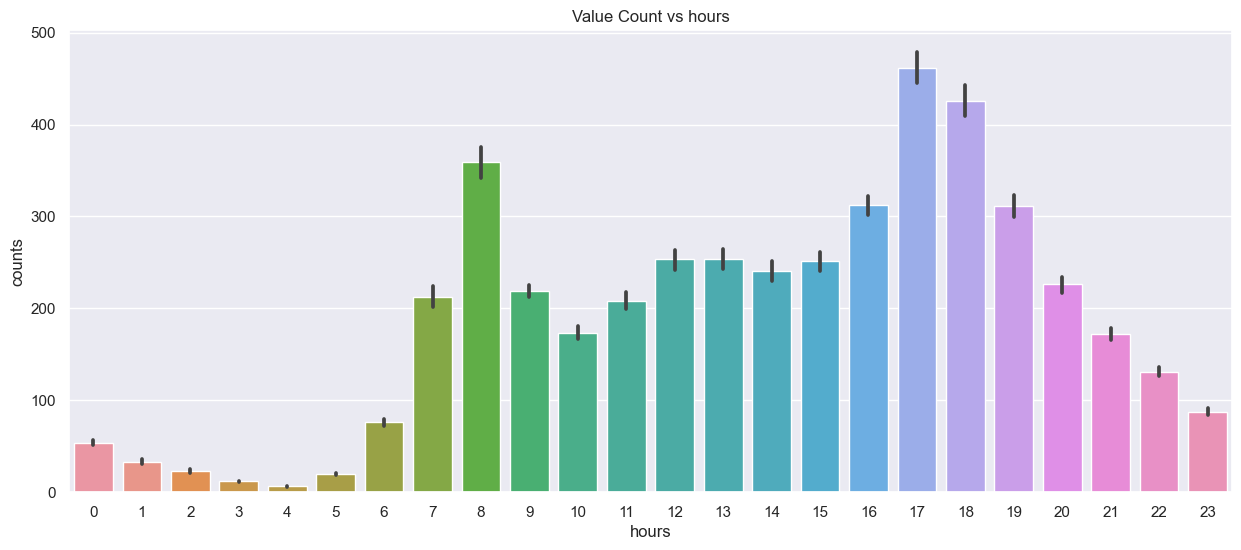

In [25]:
plt.title("Value Count vs hours")
# 24 hr time
sns.barplot(x="hours",y="counts",data=data)

<AxesSubplot:title={'center':'Value Count vs hours'}, xlabel='weathersit', ylabel='counts'>

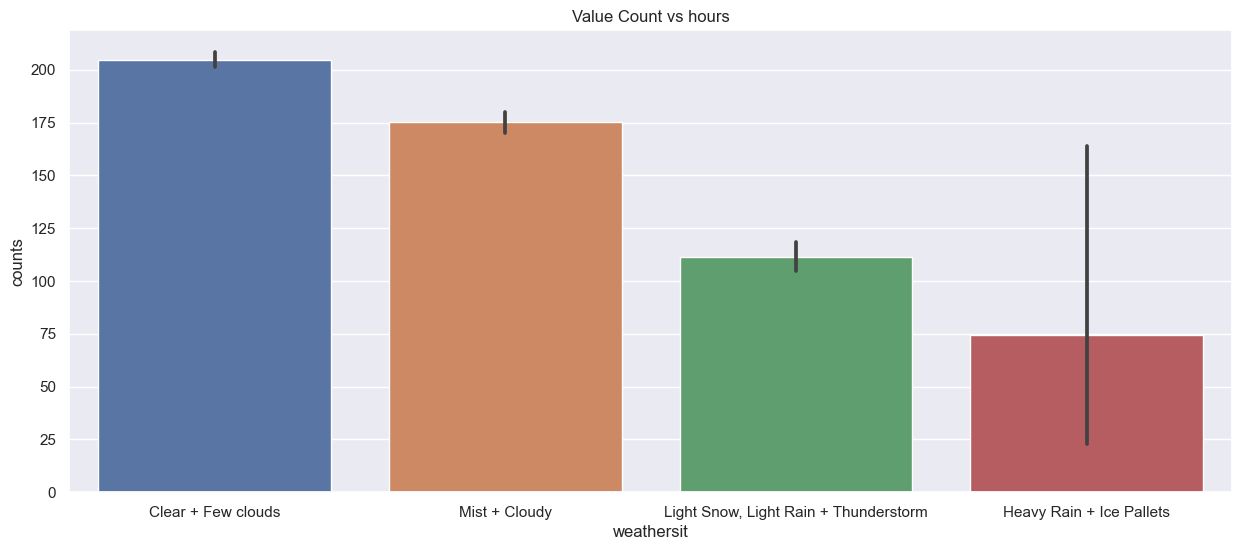

In [26]:
# weathersit : 
#     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.title("Value Count vs hours")
sns.barplot(x="weathersit",y="counts",data=data)
# observation is on Clear, Few clouds, Partly cloudy, Partly cloudy there is highest Bike Rentals

<AxesSubplot:title={'center':'workingday vs counts'}, xlabel='workingday', ylabel='counts'>

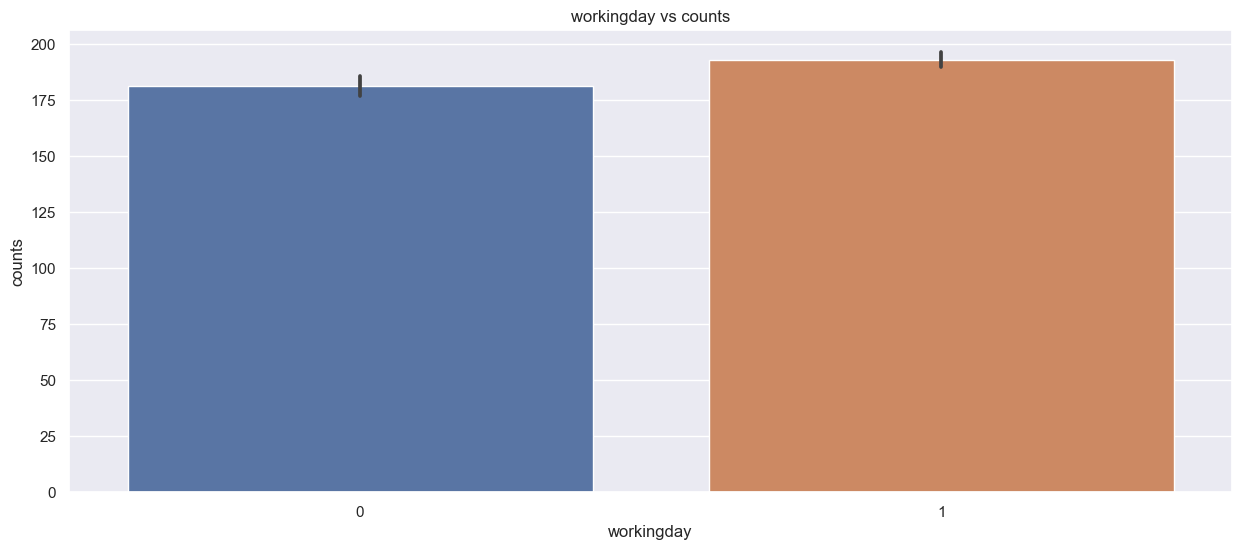

In [27]:
plt.title("workingday vs counts")
# 0 for working day and 1 for holiday
sns.barplot(x="workingday",y="counts",data=data)
# observation is on working days the Bike Rentals is higher 

<AxesSubplot:title={'center':'weekday vs counts'}, xlabel='weekday', ylabel='counts'>

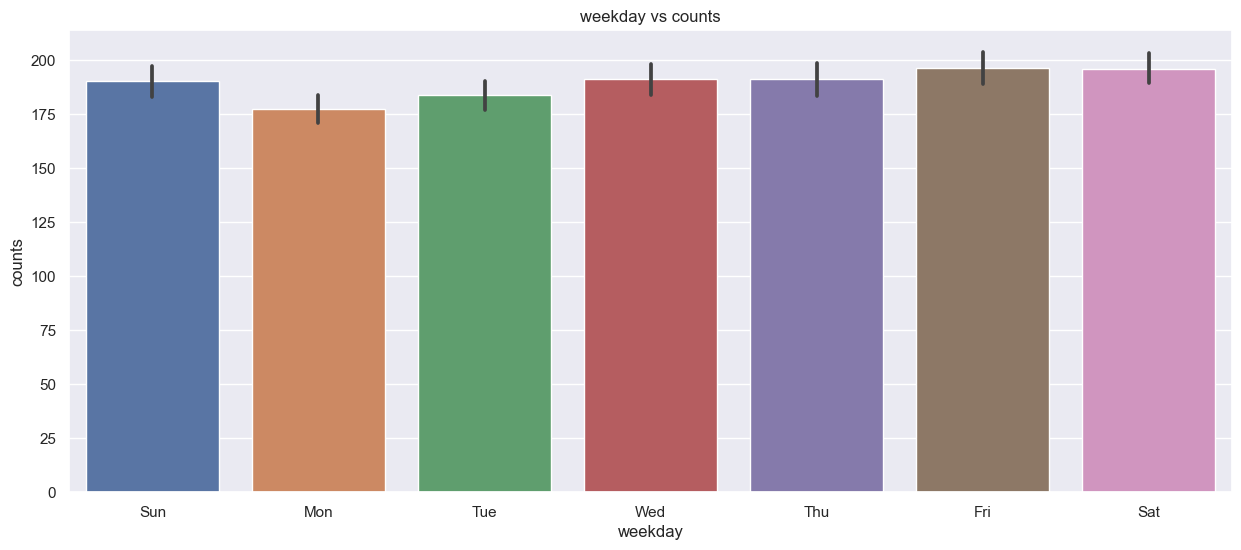

In [28]:
plt.title("weekday vs counts")
# day of the week
sns.barplot(x="weekday",y="counts",data=data)
# observation is on friday and saturday Bike Rentals is high because every one wants to rest on sunday

<AxesSubplot:title={'center':'seadson vs counts'}, xlabel='season', ylabel='counts'>

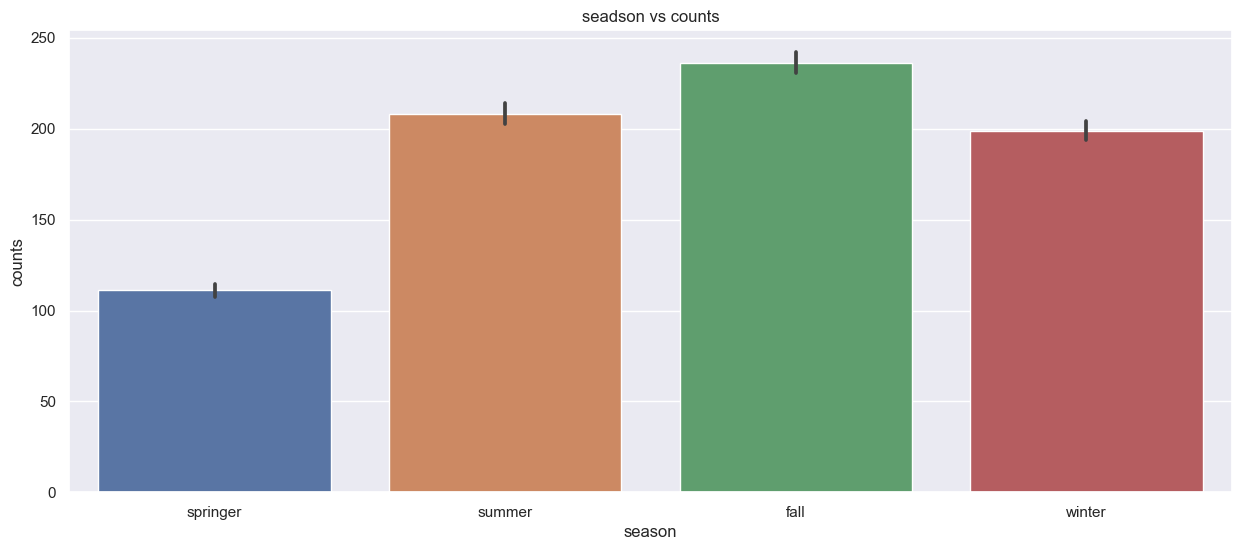

In [29]:
plt.title("seadson vs counts")
# season : season (1:springer, 2:summer, 3:fall, 4:winter)
sns.barplot(x="season",y="counts",data=data)
# observation is Bike Rentals are more during the Fall(Monsoon) season.

<AxesSubplot:>

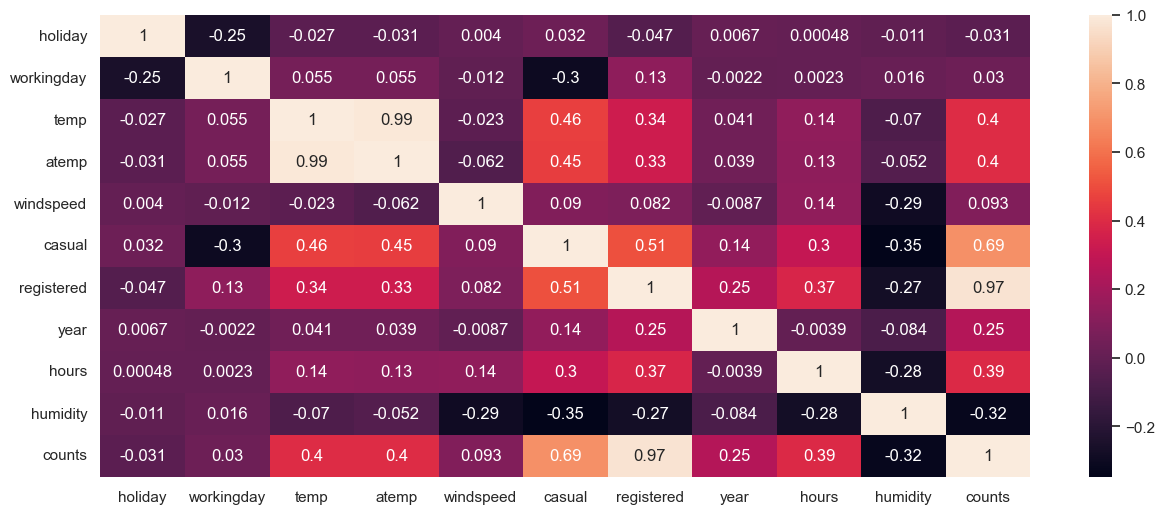

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
# Spring season : -0.6842
# Temperature : 0.3999
# Mist : -0.3647
# Sun : 0.2749
# working_day : 0.2327


In [32]:
# # use one hot encoding
# season = pd.get_dummies(data["season"],prefix="season",drop_first=True)
# week = pd.get_dummies(data["weekday"],prefix="weekday",drop_first=True)
# wather = pd.get_dummies(data["weathersit"],prefix="weathersit",drop_first=True)
# months = pd.get_dummies(data["months"],prefix="months",drop_first=True)

In [33]:
# #concatinate data 
# data = pd.concat([data,season,week,wather,months],axis=1)

In [34]:
# # # windspeed: Normalized wind speed. The values are divided to 67 (max)
# # # - casual: count of casual users
# # # - registered: count of registered users
# # # - cnt: count of total rental bikes including both casual and registered
# # # this all colums are not that much useable some are negativaly corelated
# "season","weekday","weathersit",'months'
data.drop(["atemp","windspeed","casual","registered"],axis=1,inplace=True)

In [35]:
# sns.pairplot(data)

In [36]:
catigorical_feature = data.select_dtypes(include="object").columns
print(catigorical_feature)
numerical_feature = data.select_dtypes(exclude="object").columns
print(numerical_feature)

Index(['season', 'weekday', 'weathersit', 'months'], dtype='object')
Index(['holiday', 'workingday', 'temp', 'year', 'hours', 'humidity', 'counts'], dtype='object')


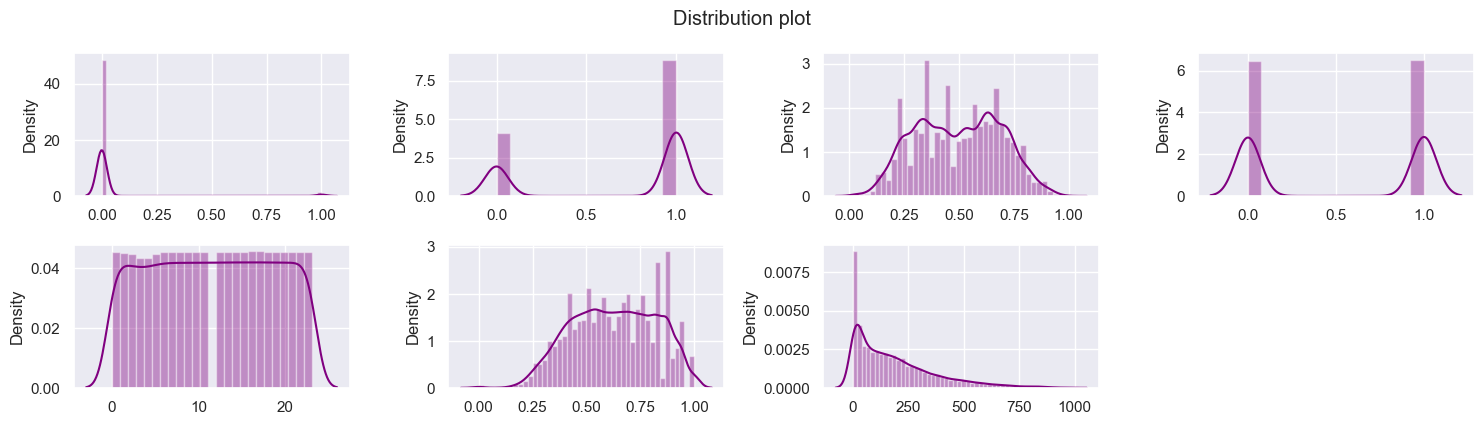

In [37]:
try:
    plt.suptitle("Distribution plot")
    for i  in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

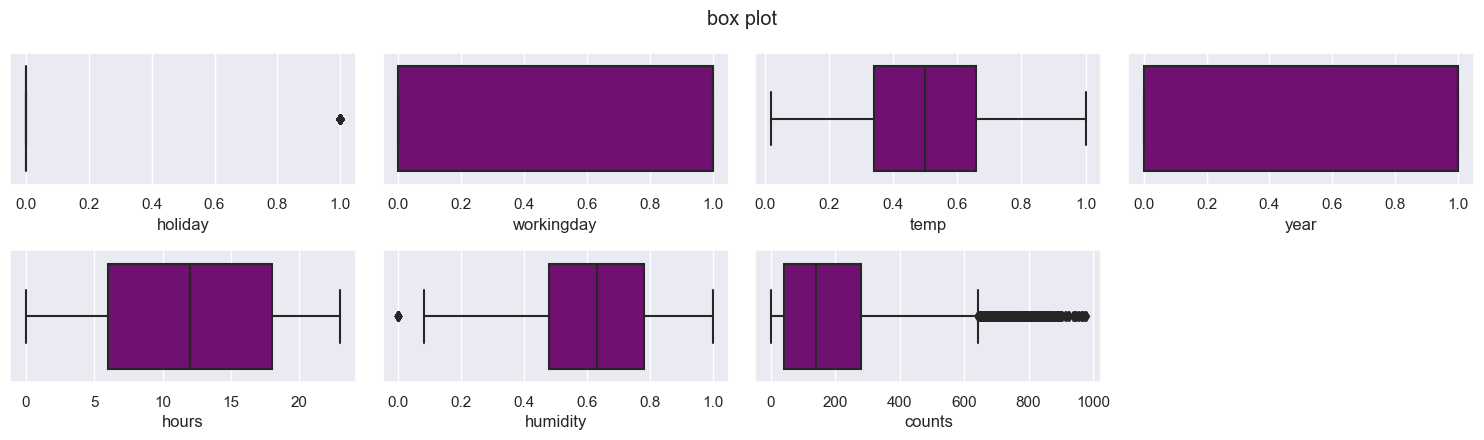

In [38]:
try:
    plt.suptitle("box plot")
    for i  in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

## Model TRaning

In [39]:
data.head()

,season,holiday,weekday,workingday,weathersit,temp,year,months,hours,humidity,counts
0,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,0,0.81,16
1,springer,0,Sun,0,Clear + Few clouds,0.22,0,Jan,1,0.80,40
2,springer,0,Sun,0,Clear + Few clouds,0.22,0,Jan,2,0.80,32
3,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,3,0.75,13
4,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,4,0.75,1


In [40]:
data.shape

(17379, 11)

In [41]:
# saprating dependent and indipend fratures
x = data.drop("counts",axis=1)
y = data["counts"]

In [42]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['season', 'weekday', 'weathersit', 'months'], dtype='object')
Index(['holiday', 'workingday', 'temp', 'year', 'hours', 'humidity'], dtype='object')


In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
# numerical Pipline

num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# catigorical pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder",OneHotEncoder()),
        ("scaler",StandardScaler(with_mean=False))
    ]
)


preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_feature)
])

In [45]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13903, 10)
(13903,)
(3476, 10)
(3476,)


In [47]:
# Transform Data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [49]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [50]:

models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3)
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_pradict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 1875805.2696166572
MAE 10311.029200230148
RMSE 13696.004050877968
R2 40.76169579212058
Ridge
Model Traning Performance
MSE 1875852.7226170776
MAE 10321.717370821923
RMSE 13696.177286444117
R2 40.7601972169113
Lesso
Model Traning Performance
MSE 1882499.388537212
MAE 10332.01145434681
RMSE 13720.42050571779
R2 40.55029418266641
Elastic
Model Traning Performance
MSE 2002037.5561510322
MAE 10613.327597427113
RMSE 14149.337638741368
R2 36.77525502894493
RandomForestRegressor
Model Traning Performance
MSE 170644.85386796456
MAE 2424.501939033189
RMSE 4130.918225624475
R2 94.61100151029778


In [51]:
# get the index of the best model
best_model_index = r2_list.index(max(r2_list))

# fetch the best model name and R2 score
best_model_name = model_list[best_model_index]
best_model_r2 = r2_list[best_model_index]

# print the best model name and R2 score
print(f"Best Model: {best_model_name}")
print(f"R2 Score: {best_model_r2}")

Best Model: RandomForestRegressor
R2 Score: 94.61100151029778


In [52]:
y_test

12830    425
8688      88
7091       4
12230    526
431       13
        ... 
6759      17
13989     85
173       98
16192    266
8211     267
Name: counts, Length: 3476, dtype: int64

In [53]:
y_predict_list

[array([442.5  , 194.625,  63.125, ...,  56.75 , 184.875, 215.   ]),
 array([439.47185056, 198.82814267,  63.57048435, ...,  53.16412435,
        189.51694651, 217.48345456]),
 array([437.97584305, 201.50174772,  64.0277226 , ...,  47.74567317,
        195.52801655, 212.6857377 ]),
 array([378.68690462, 191.21816354, 116.1920216 , ...,  74.15775905,
        180.61925618, 210.70980525]),
 array([375.95,  97.83,  12.93, ...,  78.38, 390.47, 230.21])]

Text(0, 0.5, 'Predictions')

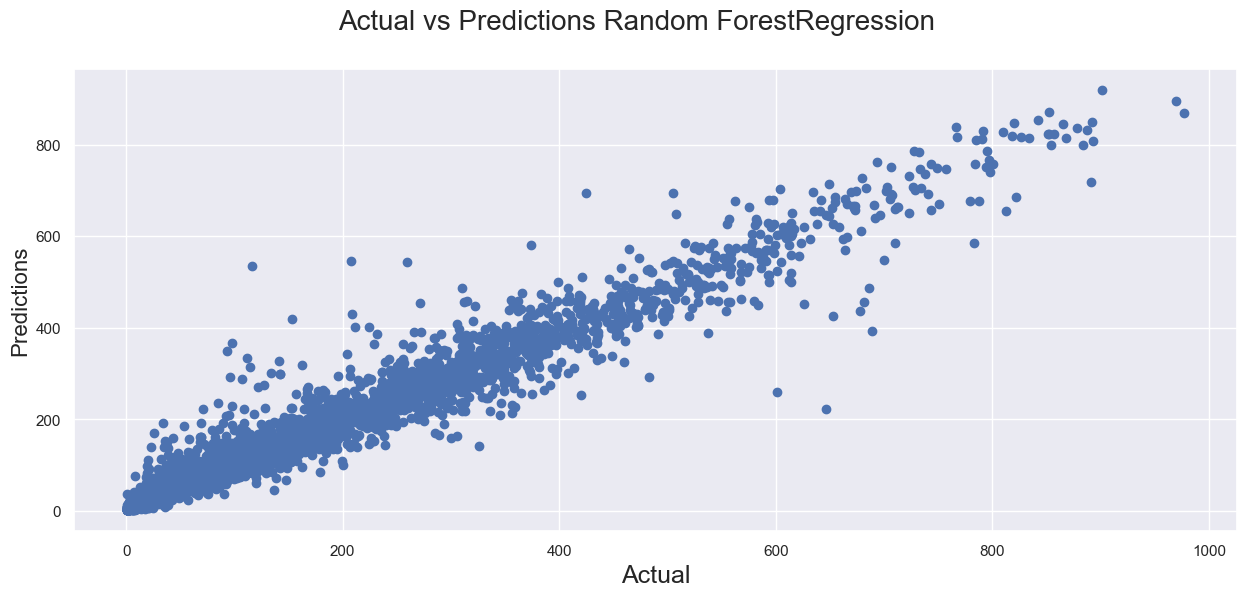

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[4])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [55]:
trainig_score

[0.40589170190375945,
 0.40599358566537036,
 0.4047632354608286,
 0.36836493425076544,
 0.9921254104581957]

In [56]:
data

,season,holiday,weekday,workingday,weathersit,temp,year,months,hours,humidity,counts
0,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,0,0.81,16
1,springer,0,Sun,0,Clear + Few clouds,0.22,0,Jan,1,0.80,40
2,springer,0,Sun,0,Clear + Few clouds,0.22,0,Jan,2,0.80,32
3,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,3,0.75,13
4,springer,0,Sun,0,Clear + Few clouds,0.24,0,Jan,4,0.75,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,springer,0,Tue,1,Mist + Cloudy,0.26,1,Dec,19,0.60,119
17375,springer,0,Tue,1,Mist + Cloudy,0.26,1,Dec,20,0.60,89
17376,springer,0,Tue,1,Clear + Few clouds,0.26,1,Dec,21,0.60,90
17377,springer,0,Tue,1,Clear + Few clouds,0.26,1,Dec,22,0.56,61


In [57]:
data.to_csv("_Rent_Bike_prediction_clean.csv",index=False)

In [65]:
data["year"].unique()

array([0, 1], dtype=int64)